### Importing the Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Load Dataset and Prepare and split the data for the test

In [ ]:
# Image Resize (128 x 128)
image_size = (128, 128)

batch_size = 32
# Normalize pixel values to [0, 1]
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Split dataset into: 80% training and 20% testing
train_data = datagen.flow_from_directory('./data/dogs',target_size=image_size, batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('./data/dogs',target_size=image_size, batch_size=batch_size, class_mode='categorical', subset='validation')

Found 10074 images belonging to 355 classes.
Found 2487 images belonging to 355 classes.


### Neural network design

In [ ]:
model = models.Sequential()

# Input shape: (128 x 128, 3)
# Input + Feature Extraction Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(2,2))


model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

### Output Layer and Classification
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(train_data.num_classes, activation='softmax'))


### Model compilation and Training

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


Epoch 1/10
 33/315 [==>...........................] - ETA: 1:35 - loss: 5.8807 - accuracy: 0.0057

/opt/anaconda3/envs/py3.10/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


315/315 [==============================] - 125s 396ms/step - loss: 5.8741 - accuracy: 0.0073 - val_loss: 5.8444 - val_accuracy: 0.0088
Epoch 2/10
315/315 [==============================] - 133s 421ms/step - loss: 5.7274 - accuracy: 0.0139 - val_loss: 5.6126 - val_accuracy: 0.0173
Epoch 3/10
315/315 [==============================] - 142s 452ms/step - loss: 5.4109 - accuracy: 0.0280 - val_loss: 5.5010 - val_accuracy: 0.0253
Epoch 4/10
315/315 [==============================] - 326s 1s/step - loss: 4.8879 - accuracy: 0.0833 - val_loss: 5.4666 - val_accuracy: 0.0470
Epoch 5/10
315/315 [==============================] - 125s 398ms/step - loss: 3.9616 - accuracy: 0.2024 - val_loss: 5.7940 - val_accuracy: 0.0772
Epoch 6/10
315/315 [==============================] - 120s 381ms/step - loss: 2.7302 - accuracy: 0.3969 - val_loss: 6.5729 - val_accuracy: 0.1118
Epoch 7/10
315/315 [==============================] - 119s 376ms/step - loss: 1.6350 - accuracy: 0.6136 - val_loss: 7.8426 - val_accuracy:

Training Details
 - Optimizer: Adam
 - Loss Function: Categorical Crossentropy
 - Epochs: 10
 - Batch Size: 32

### Model Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Accuracy:", test_accuracy)

469/469 [==============================] - 24s 52ms/step - loss: 0.0089 - accuracy: 0.9979
Test Accuracy: 0.9979333281517029


### Explanation of the Training process

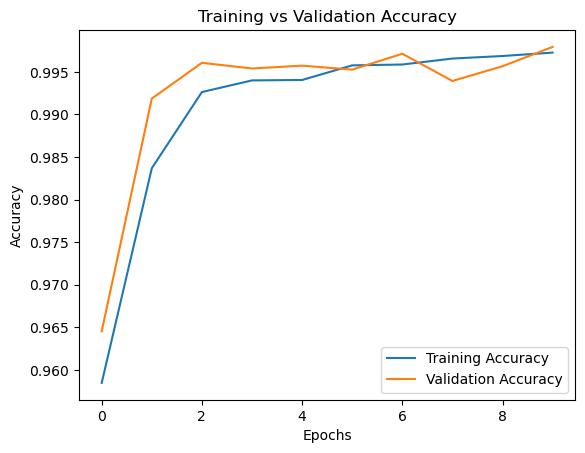

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()


### Optional: Testing a new image

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("./data/test/test-dog.jpg", target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_names = list(train_data.class_indices.keys())

print("Predicted class:", class_names[np.argmax(prediction)])


1/1 [==============================] - 0s 13ms/step
Predicted class: Karacadag


### Additional Features

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


### Final Summary

In this coursework, a convolutional neural network was designed to classify rice grain images into five categories. The model was trained using a public rice image dataset from Kaggle. After training and evaluation, the neural network achieved high classification accuracy, demonstrating the effectiveness of deep learning techniques for image classification tasks.